<a href="https://colab.research.google.com/github/udshah31/ml_assignment/blob/main/hand_written_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Implementation for MNIST Digit Recognition

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = "/content/drive/MyDrive/optdigits.tra"
mnist_data = pd.read_csv(url, header=None)

# Data prepration

In [ ]:
# checking for missing values
print(mnist_data.isnull().sum())

0     0
1     0
2     0
3     0
4     0
     ..
60    0
61    0
62    0
63    0
64    0
Length: 65, dtype: int64


In [ ]:
# Seprate the features and labels too
X = mnist_data.iloc[:,:-1].values
y = mnist_data.iloc[:, -1].values

In [ ]:
# reshaping the features into 8x8 images
X = X.reshape(-1, 8, 8, 1)

In [ ]:
# Normalize the fetures into pixel values
X = X / 16.0

In [ ]:
# encode the labels
y = to_categorical(y, num_classes = 10)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Using CNN architecture

model = Sequential([
    # 32 filters of size 3x3, ReLU activation
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(8, 8, 1)),
     # Max pooling with pool size 2x2
    MaxPooling2D(pool_size=(2, 2)),
    # 64 filters of size 3x3, ReLU activation
    Conv2D(64, (3, 3), activation='relu',padding='same'),
    # Max pooling with pool size 2x2
    MaxPooling2D(pool_size=(2, 2)),
     # Flatten the output for fully connected layers
    Flatten(),
    # Fully connected layer with 128 neurons, ReLU activation
    Dense(128, activation='relu'),
    # Output layer with 10 neurons for classification, softmax activation
    Dense(10, activation='softmax')
])

In [ ]:
# compile the model with existing paramaters
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# now train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
77/77 [==============================] - 3s 19ms/step - loss: 1.5876 - accuracy: 0.5854 - val_loss: 0.4682 - val_accuracy: 0.9134
Epoch 2/5
77/77 [==============================] - 1s 7ms/step - loss: 0.3146 - accuracy: 0.9125 - val_loss: 0.1833 - val_accuracy: 0.9477
Epoch 3/5
77/77 [==============================] - 1s 7ms/step - loss: 0.1730 - accuracy: 0.9513 - val_loss: 0.1377 - val_accuracy: 0.9575
Epoch 4/5
77/77 [==============================] - 1s 7ms/step - loss: 0.1246 - accuracy: 0.9652 - val_loss: 0.0842 - val_accuracy: 0.9804
Epoch 5/5
77/77 [==============================] - 1s 7ms/step - loss: 0.1005 - accuracy: 0.9730 - val_loss: 0.0830 - val_accuracy: 0.9804


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

24/24 [==============================] - 0s 3ms/step - loss: 0.1025 - accuracy: 0.9686
Test Accuracy: 0.9686274528503418


In [ ]:
# predict the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

24/24 [==============================] - 0s 3ms/step


In [ ]:
# draw the confusion matrix
confusion_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
print(confusion_matrix)

[[61  0  0  0  0  0  0  0  0  0]
 [ 0 82  0  0  0  0  0  0  0  1]
 [ 0  1 82  0  0  0  1  0  0  0]
 [ 0  1  0 92  0  1  0  0  0  2]
 [ 0  1  0  0 60  0  0  0  0  0]
 [ 0  0  1  0  0 66  0  0  0  2]
 [ 0  0  0  0  0  0 70  0  0  0]
 [ 0  1  0  0  0  0  0 95  0  0]
 [ 0  6  0  1  0  0  0  0 59  0]
 [ 0  2  0  1  2  0  0  0  0 74]]


In [ ]:
# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracy = []
# enumerate splits
for train, val in kfold.split(X_train, y_train):
    train_X, val_X = X_train[train], X_train[val]
    train_y, val_y = y_train[train], y_train[val]
    model.fit(train_X, train_y, epochs=5, batch_size=32, validation_data=(val_X, val_y))
    _, acc = model.evaluate(val_X, val_y)
    fold_accuracy.append(acc)
print("K-Fold:", np.mean(fold_accuracy))

Epoch 1/5
77/77 [==============================] - 1s 8ms/step - loss: 0.0815 - accuracy: 0.9791 - val_loss: 0.0846 - val_accuracy: 0.9755
Epoch 2/5
77/77 [==============================] - 1s 8ms/step - loss: 0.0609 - accuracy: 0.9841 - val_loss: 0.0886 - val_accuracy: 0.9739
Epoch 3/5
77/77 [==============================] - 1s 7ms/step - loss: 0.0508 - accuracy: 0.9873 - val_loss: 0.0881 - val_accuracy: 0.9755
Epoch 4/5
77/77 [==============================] - 1s 7ms/step - loss: 0.0492 - accuracy: 0.9873 - val_loss: 0.0887 - val_accuracy: 0.9690
Epoch 5/5
20/20 [==============================] - 0s 3ms/step - loss: 0.0803 - accuracy: 0.9788
Epoch 1/5
77/77 [==============================] - 1s 7ms/step - loss: 0.0440 - accuracy: 0.9877 - val_loss: 0.0520 - val_accuracy: 0.9837
Epoch 2/5
77/77 [==============================] - 1s 10ms/step - loss: 0.0395 - accuracy: 0.9894 - val_loss: 0.0379 - val_accuracy: 0.9902
Epoch 3/5
77/77 [==============================] - 1s 12ms/step - lo

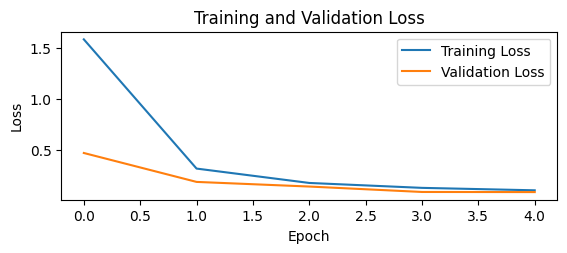

In [ ]:
# Plot training and validation loss
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

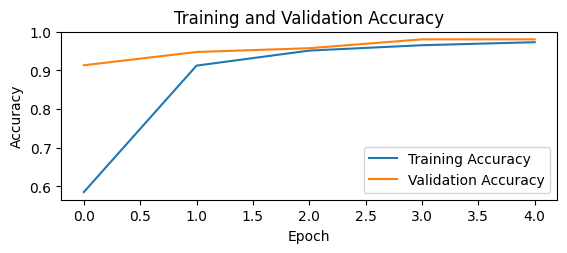

In [ ]:
# Plot training and validation accuracy
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy: mean=99.216 std=0.755, n=5


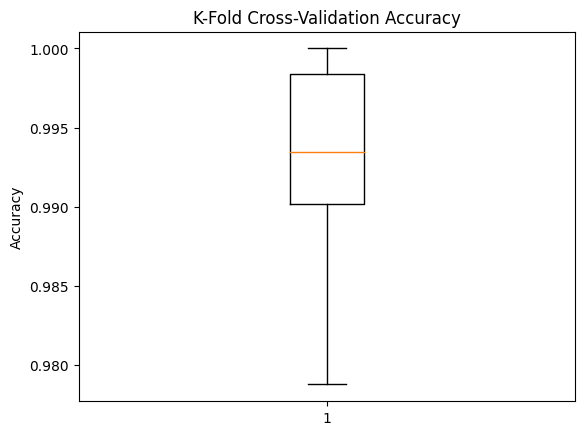

In [ ]:
# Summarize model performance
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(fold_accuracy)*100, np.std(fold_accuracy)*100, len(fold_accuracy)))

# Box and whisker plot of results
plt.boxplot(fold_accuracy)
plt.title('K-Fold Cross-Validation Accuracy')
plt.ylabel('Accuracy')
plt.show()